In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# **Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# **Check Data Info and Preprocessing**

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

# **Define Features and Target Variable**

In [6]:
X = df.drop('target', axis=1)  # Features
y = df['target']               # Labels (1 = heart disease, 0 = no disease)

# **Split the Data**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train Logistic Regression**

In [9]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

print("📘 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))


📘 Logistic Regression
Accuracy: 0.7951219512195122
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



# **Train K-Nearest Neighbors (KNN)**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_preds = knn_model.predict(X_test)

print("📗 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))


📗 K-Nearest Neighbors
Accuracy: 0.7317073170731707
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



# **Train Support Vector Machine (SVM)**

In [11]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)

print("📕 Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


📕 Support Vector Machine (SVM)
Accuracy: 0.6829268292682927
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205



# **Compare All Models Side-by-Side**

In [12]:
models = {
    "Logistic Regression": accuracy_score(y_test, log_preds),
    "KNN": accuracy_score(y_test, knn_preds),
    "SVM": accuracy_score(y_test, svm_preds)
}

print("\n📊 Model Accuracy Comparison:")
for name, acc in models.items():
    print(f"{name}: {acc:.4f}")



📊 Model Accuracy Comparison:
Logistic Regression: 0.7951
KNN: 0.7317
SVM: 0.6829


# **Agent with Best Model**

In [17]:
from sklearn.metrics import accuracy_score

log_acc = accuracy_score(y_test, log_model.predict(X_test))
knn_acc = accuracy_score(y_test, knn_model.predict(X_test))
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

In [18]:
models = {
    "Logistic Regression": (log_model, log_acc),
    "KNN": (knn_model, knn_acc),
    "SVM": (svm_model, svm_acc)
}

best_model_name = max(models, key=lambda x: models[x][1])
best_model, best_acc = models[best_model_name]

print(f"✅ Best Model Selected: {best_model_name} with Accuracy: {best_acc:.4f}")

✅ Best Model Selected: Logistic Regression with Accuracy: 0.7951


# **Class Balance of Target Variable**

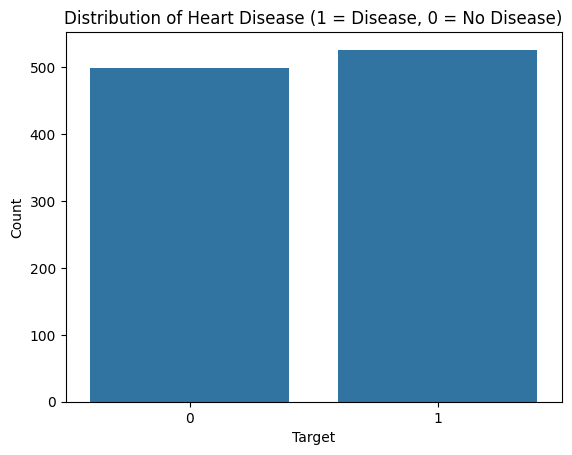

In [19]:
sns.countplot(data=df, x='target')
plt.title("Distribution of Heart Disease (1 = Disease, 0 = No Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# **Correlation Heatmap**

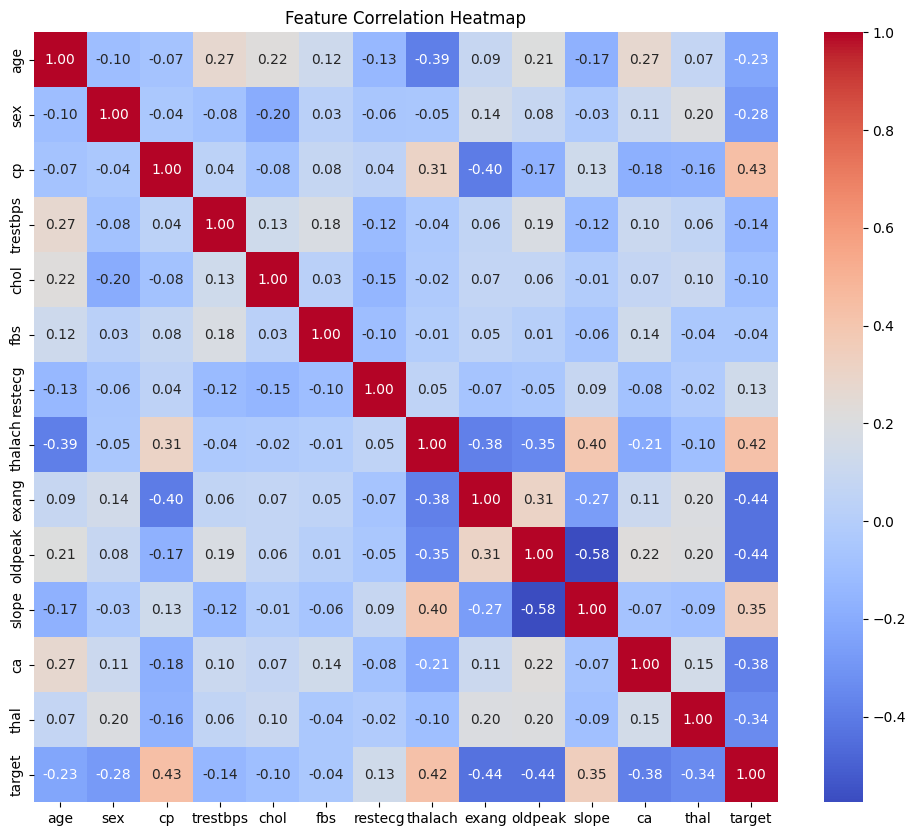

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Pairplot of Key Features**

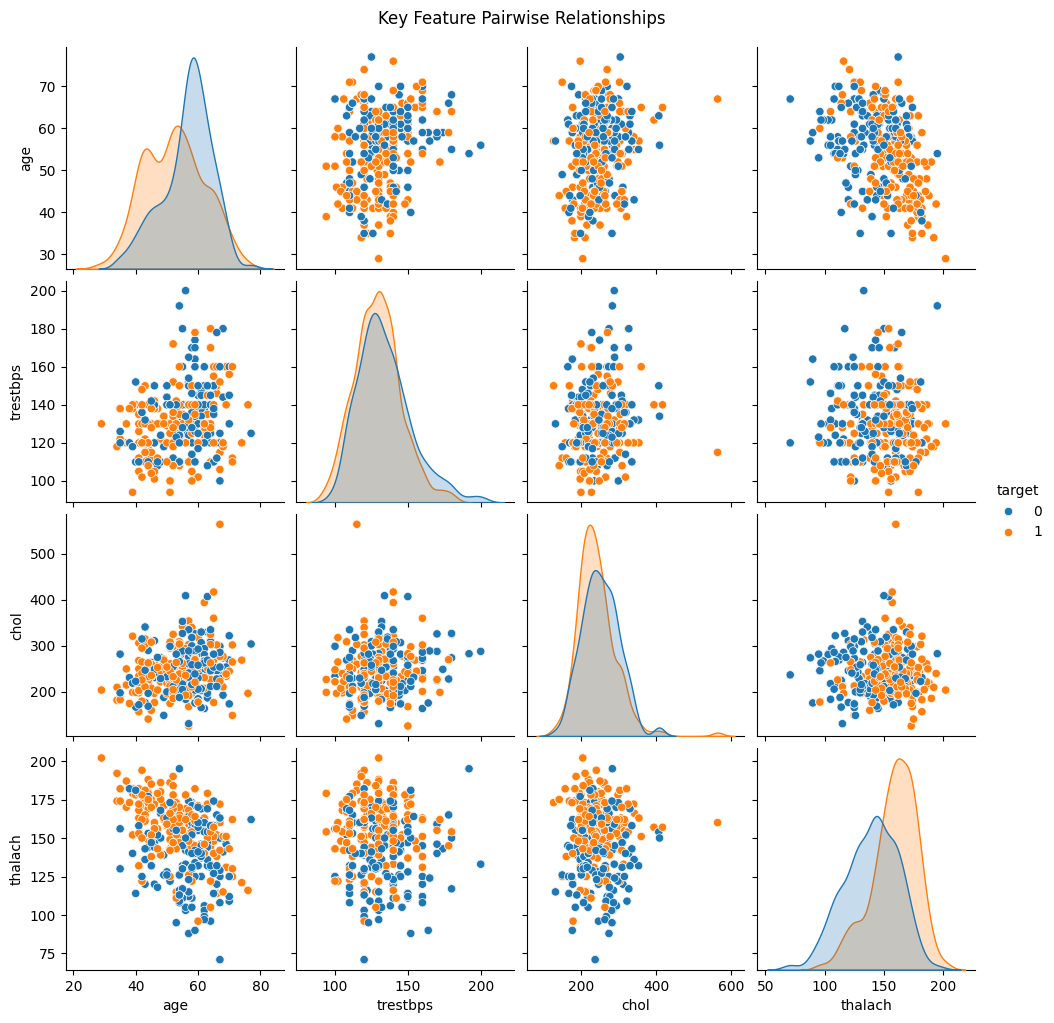

In [21]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')
plt.suptitle("Key Feature Pairwise Relationships", y=1.02)
plt.show()

# **Boxplot: Cholesterol by Target**

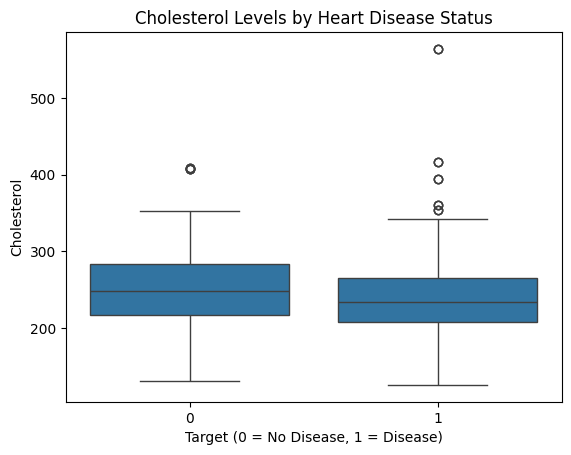

In [22]:
sns.boxplot(data=df, x='target', y='chol')
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Cholesterol")
plt.show()

# **Bar Chart: Model Accuracy Comparison**

In [23]:
model_names = ['Logistic Regression', 'KNN', 'SVM']
accuracies = [log_acc, knn_acc, svm_acc]

/tmp/ipython-input-24-2119926715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


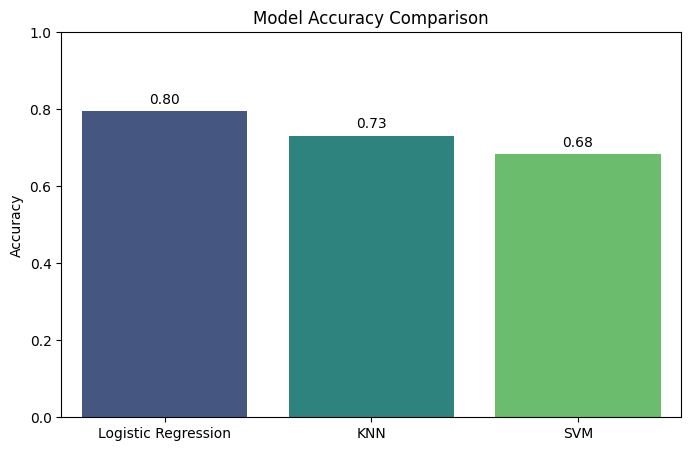

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

# **ROC Curve for All 3 Models**

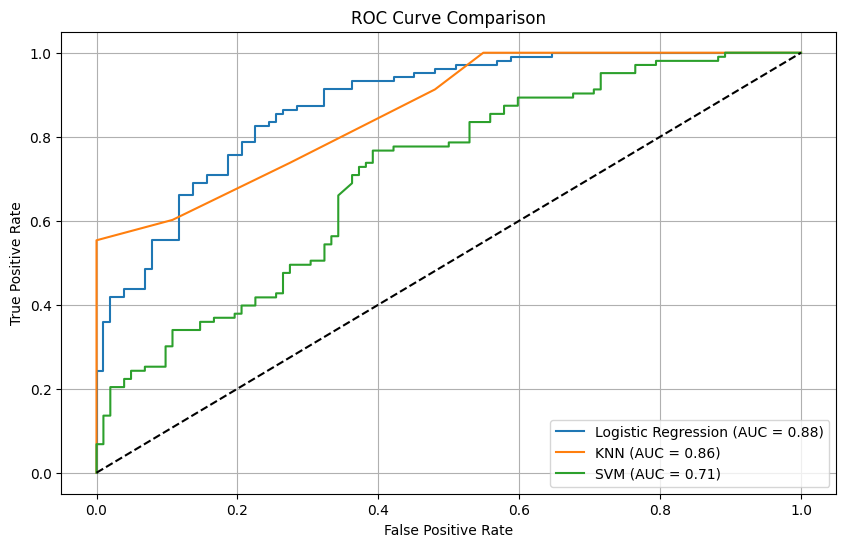

In [25]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# Logistic Regression
log_probs = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')

# KNN
knn_probs = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')

# SVM (must enable probability=True when defining SVC)
svm_probs = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

# Random line
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# **Dashboard Layout**

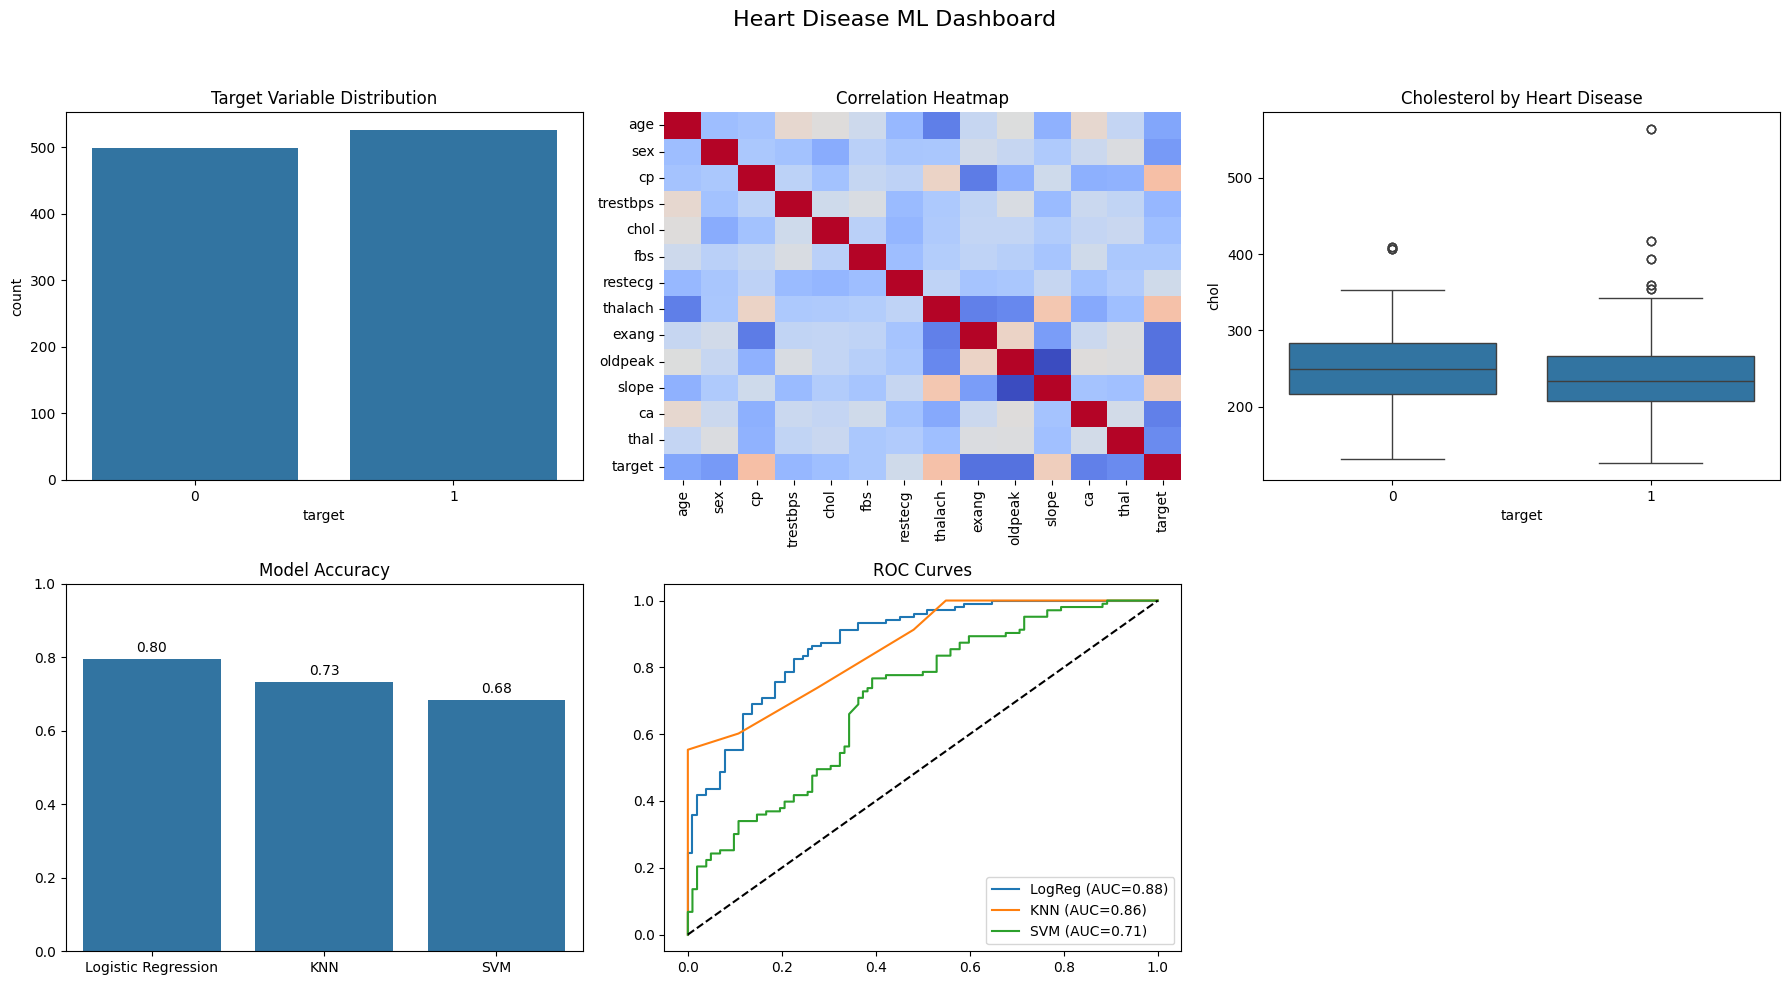

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Heart Disease ML Dashboard", fontsize=16)

# 1. Class Balance
sns.countplot(data=df, x='target', ax=axs[0, 0])
axs[0, 0].set_title("Target Variable Distribution")

# 2. Correlation Heatmap
sns.heatmap(df.corr(), ax=axs[0, 1], cmap='coolwarm', annot=False, cbar=False)
axs[0, 1].set_title("Correlation Heatmap")

# 3. Boxplot (Cholesterol)
sns.boxplot(data=df, x='target', y='chol', ax=axs[0, 2])
axs[0, 2].set_title("Cholesterol by Heart Disease")

# 4. Accuracy Bar Plot
model_names = ['Logistic Regression', 'KNN', 'SVM']
accuracies = [log_acc, knn_acc, svm_acc]
sns.barplot(x=model_names, y=accuracies, ax=axs[1, 0])
axs[1, 0].set_title("Model Accuracy")
axs[1, 0].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    axs[1, 0].text(i, v + 0.02, f"{v:.2f}", ha='center')

# 5. ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
axs[1, 1].plot(fpr_log, tpr_log, label=f'LogReg (AUC={auc(fpr_log, tpr_log):.2f})')
axs[1, 1].plot(fpr_knn, tpr_knn, label=f'KNN (AUC={auc(fpr_knn, tpr_knn):.2f})')
axs[1, 1].plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc(fpr_svm, tpr_svm):.2f})')
axs[1, 1].plot([0, 1], [0, 1], 'k--')
axs[1, 1].set_title("ROC Curves")
axs[1, 1].legend()

# 6. Empty slot for pairplot or skip it
axs[1, 2].axis('off')  # Optional

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
